In [1]:
"""Network intrusion detection system using CNN model and keras"""

# @author: Richard (Dinesh Kumar Gupta)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


In [2]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
print("Libraries has been imported")

Libraries has been imported


In [3]:
#  Open the data file using read_csv() method of pandas
df_train = pd.read_csv("/kaggle/input/network-intrusion-detection/Train_data.csv")
df_test = pd.read_csv("/kaggle/input/network-intrusion-detection/Test_data.csv")
df_train.head()
#df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
# Observe the shape of df_train data 
df_train.shape

(25192, 42)

In [5]:
# Examine the presence of null value in the data using isna().sum method
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
# Look into any presence of duplicate value using duplicated().sum() method
df_train.duplicated().sum()

0

In [7]:
# Inspect the datatypes using dtypes method
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
# Examine the unique values in flag columns using unique().shape func
df_train["flag"].unique().shape

(11,)

In [9]:
# Applying LabelEcoder and staradardscaler; OneHotEncoder on the data
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()

cols_label_encoder = ["service", "flag", "class"]
cls_scaler = []
cols_onehot = ["protocol_type"]

# apply the fit_transform() method and looping on data 
for col in cols_label_encoder:
    df_train[col] = encoder.fit_transform(df_train[col])
    
# utilize get_dummies() method in categorizing variables 
df_train = pd.get_dummies(df_train, columns=cols_onehot)

In [10]:
# Observe the first five datasets of df_train using head() method 
df_train.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,19,9,491,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,False,True,False
1,0,41,9,146,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,1,False,False,True
2,0,46,5,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,False,True,False
3,0,22,9,232,8153,0,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,False,True,False
4,0,22,9,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,False,True,False


In [11]:
# Print the name of columns using columns method
df_train.columns

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class',
       'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp'],
      dtype='object')

In [14]:
# Examine the data types in the df_train data using dtypes methods
df_train.dtypes

duration                       float64
service                        float64
flag                           float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

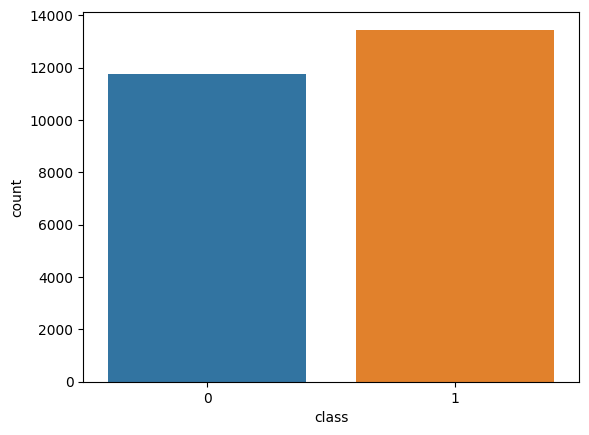

In [15]:
# Plot countplot of column "class" using seaborn library
sns.countplot(x=df_train["class"], data=df_train)
plt.show()

In [16]:
# Remove class column from df_train data using drop() method 
X = df_train.drop(labels="class", axis=1)
y = df_train["class"]

In [17]:
# Ensure that all columns are of numeric data types
X = X.astype('float32')
y = y.astype('float32')

In [18]:
# Split the dataset into train and test using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [19]:
X_train.shape[1], X_test.shape[1]

(41, 41)

In [20]:
# Creating a CNN model
input_dim = X_train.shape[1]  # Set the input dimension based on the number of features

model = Sequential([
    Dense(128, input_dim=input_dim, activation="relu"),
    Dense(64, kernel_regularizer=l2(0.01), activation="relu"),
    Dense(64, kernel_regularizer=l2(0.01), activation="relu"),
    Dense(64, kernel_regularizer=l2(0.01), activation="relu"),
    Dropout(0.25),
    Dense(1, activation="sigmoid")
])


In [21]:
# Compile the model using Adam and loss="binary_crossentropy"
model.compile(Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
# Fit the created model and validate with data
history = model.fit(X_train, y_train, batch_size=32, epochs=32,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/32
630/630 [==============================] - 3s 3ms/step - loss: 390.1069 - accuracy: 0.8648 - val_loss: 110.8543 - val_accuracy: 0.8768
Epoch 2/32
630/630 [==============================] - 1s 2ms/step - loss: 128.0139 - accuracy: 0.9043 - val_loss: 378.9062 - val_accuracy: 0.6860
Epoch 3/32
630/630 [==============================] - 1s 2ms/step - loss: 59.9643 - accuracy: 0.9216 - val_loss: 164.7852 - val_accuracy: 0.9115
Epoch 4/32
630/630 [==============================] - 2s 2ms/step - loss: 193.5192 - accuracy: 0.9201 - val_loss: 217.2061 - val_accuracy: 0.9387
Epoch 5/32
630/630 [==============================] - 1s 2ms/step - loss: 98.1524 - accuracy: 0.9138 - val_loss: 78.6190 - val_accuracy: 0.8516
Epoch 6/32
630/630 [==============================] - 1s 2ms/step - loss: 146.3550 - accuracy: 0.9217 - val_loss: 52.4530 - val_accuracy: 0.8960
Epoch 7/32
630/630 [==============================] - 2s 2ms/step - loss: 11.8413 - accuracy: 0.9495 - val_loss: 6.7486 - val_ac

In [23]:
# Write a function for plotting learning curve

def plot_learning_curve(history, epochs):
    # Plot model accuracy 
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history["accuracy"])
    plt.plot(epoch_range, history.history["val_accuracy"])
    plt.title("Network intrusion detection CNN model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "validation"], loc="upper left")
    plt.show()

    # Plot model loss 
    plt.plot(epoch_range, history.history["loss"])
    plt.plot(epoch_range, history.history["val_loss"])
    plt.title("Network intrusion detection CNN model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "validation"], loc="upper left")
    plt.show()

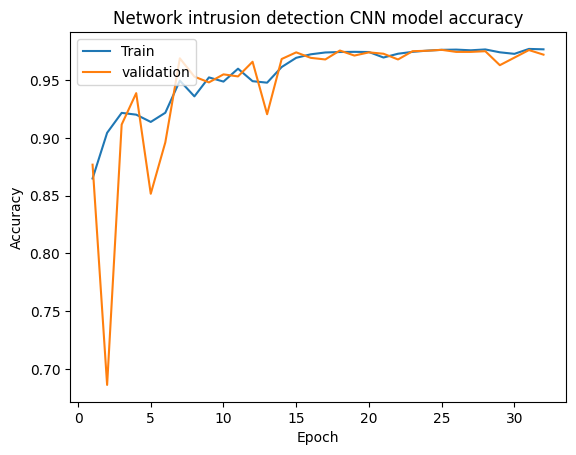

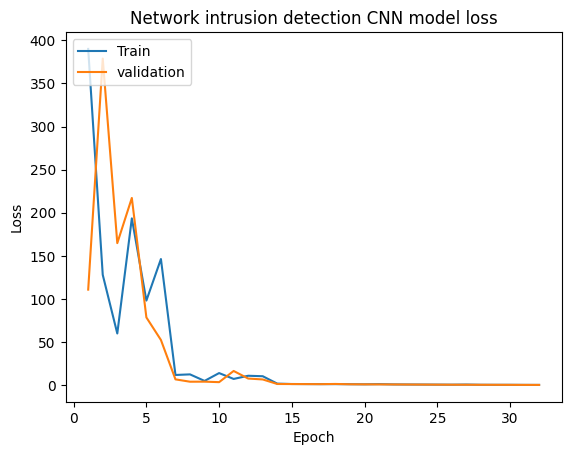

In [24]:
# Display the graph of model accuracy and model loss
plot_learning_curve(history, 32)

In [25]:
# Print the CNN model summary using summary() methods
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,017
Trainable params: 22,017
Non-traina

In [26]:
# Know the shape of the X_test data using shape function
X_test.shape

(5039, 41)

In [27]:
# Apply predict() method on the created CNN model to predict the X_test data 
y_pred = model.predict(X_test)

158/158 [==============================] - 0s 1ms/step


In [28]:

# Computing classification report (Precision, Recall, f1 score) and accuracy score

# Import metrics from sklearn
from sklearn.metrics import classification_report, accuracy_score

# Define a threshold (usually 0.5) to convert probabilities to binary class labels
threshold = 0.5

# Convert continuous probabilities to binary class labels
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate classification report and accuracy using binary labels
cr = classification_report(y_test, y_pred_binary, labels=[0, 1]) # target_names=["Non-Intrusion", "Intrusion"])
accs = accuracy_score(y_test, y_pred_binary)

print(cr)
print(f"Accuracy score of CNN model is : {accs}")

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2333
           1       0.96      0.99      0.97      2706

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039

Accuracy score of CNN model is : 0.9720182575907919
